In [1]:
import pandas as pd

In [2]:
census_df = pd.read_csv("PLACES__Census_Tract_Data__GIS_Friendly_Format___2021_release.csv")
census_df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,OBESITY_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AZ,Arizona,Maricopa,4013,4013422643,5789,11.9,"(10.1, 14.0)",17.0,"(16.1, 17.9)",...,"(26.9, 29.7)",9.2,"( 8.2, 10.2)",34.5,"(33.0, 36.3)",1.8,"( 1.6, 2.0)",8.0,"( 5.2, 11.6)",POINT (-111.61853 33.35726769)
1,CA,California,Sacramento,6067,6067007402,6180,15.4,"(13.5, 17.3)",24.6,"(23.8, 25.3)",...,"(29.6, 31.4)",15.1,"(14.2, 16.2)",35.7,"(34.8, 36.7)",3.9,"( 3.6, 4.3)",18.2,"(13.7, 23.5)",POINT (-121.3791473 38.6869681)
2,AL,Alabama,Madison,1089,1089000201,760,25.4,"(21.2, 30.1)",36.0,"(34.6, 37.3)",...,"(46.6, 49.7)",22.5,"(20.4, 24.7)",50.3,"(48.8, 51.3)",7.6,"( 6.8, 8.6)",33.3,"(24.1, 43.8)",POINT (-86.55005486 34.77465775)
3,AL,Alabama,Montgomery,1101,1101002202,1185,25.2,"(21.2, 29.4)",36.1,"(35.0, 37.3)",...,"(45.3, 47.9)",20.7,"(19.1, 22.7)",49.7,"(48.3, 51.1)",7.2,"( 6.4, 8.0)",34.0,"(25.6, 42.0)",POINT (-86.30555503 32.31774882)
4,AL,Alabama,Butler,1013,1013952800,1394,14.3,"(11.9, 17.1)",36.0,"(34.5, 37.4)",...,"(32.3, 35.2)",15.2,"(13.5, 16.9)",35.7,"(33.9, 37.5)",4.2,"( 3.6, 4.8)",15.1,"( 8.9, 22.9)",POINT (-86.62833756 31.83774723)


In [3]:
census_columns = census_df.columns

for column in census_columns:
    if ("CI" in column):
        census_df = census_df.drop(column, axis=1)

In [4]:
census_df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,...,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,AZ,Arizona,Maricopa,4013,4013422643,5789,11.9,17.0,19.9,23.7,...,2.1,18.1,73.8,13.9,28.3,9.2,34.5,1.8,8.0,POINT (-111.61853 33.35726769)
1,CA,California,Sacramento,6067,6067007402,6180,15.4,24.6,19.6,30.5,...,3.4,28.0,76.5,16.1,30.5,15.1,35.7,3.9,18.2,POINT (-121.3791473 38.6869681)
2,AL,Alabama,Madison,1089,1089000201,760,25.4,36.0,10.5,53.7,...,5.5,48.2,84.1,22.8,48.2,22.5,50.3,7.6,33.3,POINT (-86.55005486 34.77465775)
3,AL,Alabama,Montgomery,1101,1101002202,1185,25.2,36.1,10.9,54.6,...,4.9,44.9,85.4,21.4,46.7,20.7,49.7,7.2,34.0,POINT (-86.30555503 32.31774882)
4,AL,Alabama,Butler,1013,1013952800,1394,14.3,36.0,13.4,43.0,...,3.3,33.1,77.5,15.6,33.8,15.2,35.7,4.2,15.1,POINT (-86.62833756 31.83774723)


In [5]:
census_df = census_df.drop(columns=["CountyFIPS", "TractFIPS"])

In [6]:
geo_location = census_df["Geolocation"]
census_df = census_df.drop("Geolocation", axis=1)

In [7]:
census_df

,StateAbbr,StateDesc,CountyName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,...,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
0,AZ,Arizona,Maricopa,5789,11.9,17.0,19.9,23.7,63.0,5.2,...,27.4,2.1,18.1,73.8,13.9,28.3,9.2,34.5,1.8,8.0
1,CA,California,Sacramento,6180,15.4,24.6,19.6,30.5,71.1,6.8,...,29.9,3.4,28.0,76.5,16.1,30.5,15.1,35.7,3.9,18.2
2,AL,Alabama,Madison,760,25.4,36.0,10.5,53.7,80.4,5.7,...,32.5,5.5,48.2,84.1,22.8,48.2,22.5,50.3,7.6,33.3
3,AL,Alabama,Montgomery,1185,25.2,36.1,10.9,54.6,80.0,5.9,...,34.5,4.9,44.9,85.4,21.4,46.7,20.7,49.7,7.2,34.0
4,AL,Alabama,Butler,1394,14.3,36.0,13.4,43.0,80.4,8.6,...,38.8,3.3,33.1,77.5,15.6,33.8,15.2,35.7,4.2,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72332,WI,Wisconsin,Milwaukee,3953,9.0,30.4,22.7,30.3,77.1,8.8,...,35.1,2.8,19.8,77.7,11.5,30.0,10.3,30.0,3.0,8.6
72333,WI,Wisconsin,Barron,4215,12.1,30.8,20.5,33.8,75.7,8.0,...,34.9,3.2,26.8,76.0,14.6,35.7,13.7,33.4,3.7,14.4
72334,WI,Wisconsin,Ozaukee,6079,9.9,25.3,25.1,29.2,71.1,6.9,...,33.6,2.4,21.8,74.6,13.2,35.0,10.8,32.5,2.7,10.8
72335,WI,Wisconsin,Waushara,4515,15.8,31.9,19.5,36.8,76.7,8.3,...,35.9,3.7,30.8,74.5,15.3,39.4,15.5,34.0,4.4,18.6


In [8]:
census_df = census_df.drop(columns=["StateAbbr", "StateDesc", "CountyName"])

In [9]:
census_df = census_df.dropna()

In [10]:
census_df.isna().sum()

TotalPopulation           0
ACCESS2_CrudePrev         0
ARTHRITIS_CrudePrev       0
BINGE_CrudePrev           0
BPHIGH_CrudePrev          0
BPMED_CrudePrev           0
CANCER_CrudePrev          0
CASTHMA_CrudePrev         0
CERVICAL_CrudePrev        0
CHD_CrudePrev             0
CHECKUP_CrudePrev         0
CHOLSCREEN_CrudePrev      0
COLON_SCREEN_CrudePrev    0
COPD_CrudePrev            0
COREM_CrudePrev           0
COREW_CrudePrev           0
CSMOKING_CrudePrev        0
DENTAL_CrudePrev          0
DEPRESSION_CrudePrev      0
DIABETES_CrudePrev        0
GHLTH_CrudePrev           0
HIGHCHOL_CrudePrev        0
KIDNEY_CrudePrev          0
LPA_CrudePrev             0
MAMMOUSE_CrudePrev        0
MHLTH_CrudePrev           0
OBESITY_CrudePrev         0
PHLTH_CrudePrev           0
SLEEP_CrudePrev           0
STROKE_CrudePrev          0
TEETHLOST_CrudePrev       0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = census_df.drop("SLEEP_CrudePrev", axis=1)
y = census_df["SLEEP_CrudePrev"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
import matplotlib.pyplot as plt

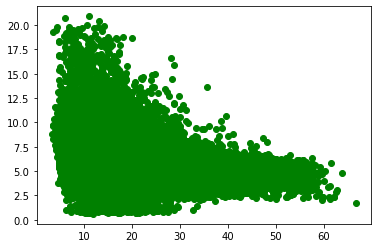

In [15]:
plt.scatter(census_df["ACCESS2_CrudePrev"],census_df["CANCER_CrudePrev"], color='green')

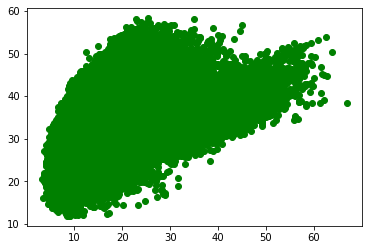

In [16]:
plt.scatter(census_df["ACCESS2_CrudePrev"],census_df["OBESITY_CrudePrev"], color='green')

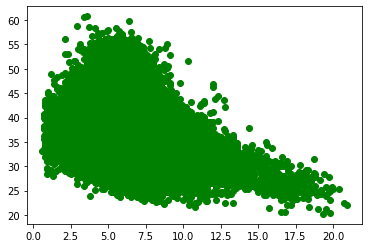

In [17]:
plt.scatter(census_df["CANCER_CrudePrev"],census_df["SLEEP_CrudePrev"], color='green')

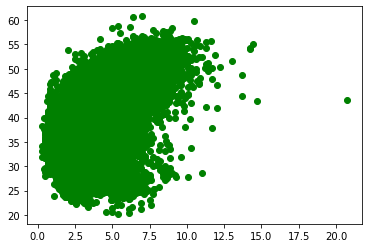

In [18]:
plt.scatter(census_df["STROKE_CrudePrev"],census_df["SLEEP_CrudePrev"], color='green')

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([31.76558688, 34.19111407, 32.33035349, ..., 22.95401738,
       37.68674109, 30.69402637])

In [23]:
from sklearn.metrics import r2_score

In [24]:
accuracy = r2_score(y_test, y_pred)*100
print(f'Accuracy if the model is {accuracy}')

Accuracy if the model is 86.00122181070624


In [25]:
import seaborn as sns

Text(0, 0.5, 'Predicted')

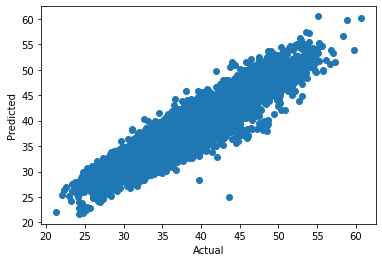

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel("Predicted")

<AxesSubplot:xlabel='SLEEP_CrudePrev'>

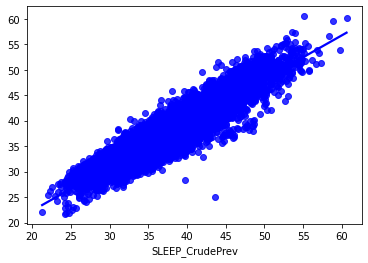

In [27]:
sns.regplot(x=y_test,y=y_pred, ci=None, color="blue", )